# WHO Suicide Statistic 1979 - 2016

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Create a dataframe

In [2]:
df = pd.read_csv(r"C:\Users\rajes\Downloads\Compressed\WHO Suicide Stats\who_suicide_statistics.csv")

## Analyze
#### Task 1: Data Exploration and Cleaning

In [3]:
df.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [40]:
# Convert data types
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [6]:
# Check if there is any null value in the data
df.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [7]:
# Filter rows where "suicides_no" column has missing values
df_null_sn = df[df["suicides_no"].isna()]
df_null_sn.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [8]:
# Reassign missing values in "suicides_no" column to 0 in the original dataset
df["suicides_no"].fillna(0, inplace=True)
df.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no       0
population     5460
dtype: int64

In [9]:
# How many times is country represented in the data?
df["country"].value_counts()

Hungary                     456
Mauritius                   456
Netherlands                 456
Austria                     456
United States of America    456
                           ... 
Saudi Arabia                 24
Macau                        12
Cabo Verde                   12
Iraq                         12
Zimbabwe                     12
Name: country, Length: 141, dtype: int64

In [10]:
# Sort the data by suicides_no from maximum to minimum value
df_sort = df.sort_values("suicides_no", ascending=False)
df_sort.head(10)

,country,year,sex,age,suicides_no,population
33128,Russian Federation,1994,male,35-54 years,22338.0,19044200.0
33140,Russian Federation,1995,male,35-54 years,21706.0,19249600.0
33212,Russian Federation,2001,male,35-54 years,21262.0,21476420.0
33200,Russian Federation,2000,male,35-54 years,21063.0,21378098.0
33188,Russian Federation,1999,male,35-54 years,20705.0,21016400.0
33152,Russian Federation,1996,male,35-54 years,20562.0,19507100.0
33116,Russian Federation,1993,male,35-54 years,20256.0,18908000.0
33224,Russian Federation,2002,male,35-54 years,20119.0,21320535.0
33164,Russian Federation,1997,male,35-54 years,18973.0,19913400.0
33236,Russian Federation,2003,male,35-54 years,18681.0,21007346.0


In [95]:
# What is the mean suicide_no for each country?
country_suicide_mean = df.groupby(["country"]).mean(numeric_only=True)[["suicides_no"]]
country_suicide_mean.sort_values("suicides_no", ascending=False).head(10)

,suicides_no
country,
Russian Federation,3474.518519
United States of America,2634.651316
Japan,2111.743243
Germany,933.532051
Ukraine,922.146465
France,915.509259
Republic of Korea,703.575269
Brazil,564.918919
Sri Lanka,420.557292


#### Task 2:Data Analysis & Data Visualization

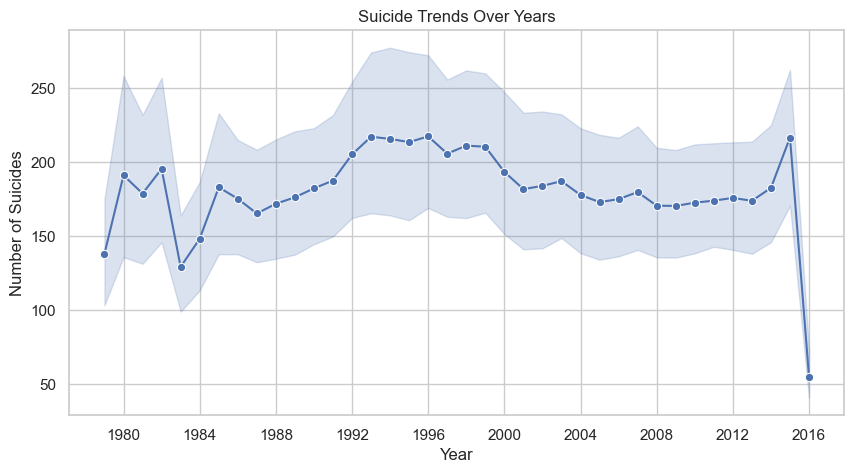

In [152]:
# Create the plot Suicide Trends Over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="year", y="suicides_no", estimator='mean', marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Suicides")
plt.title("Suicide Trends Over Years")
plt.xticks()
plt.grid(True)
plt.show()

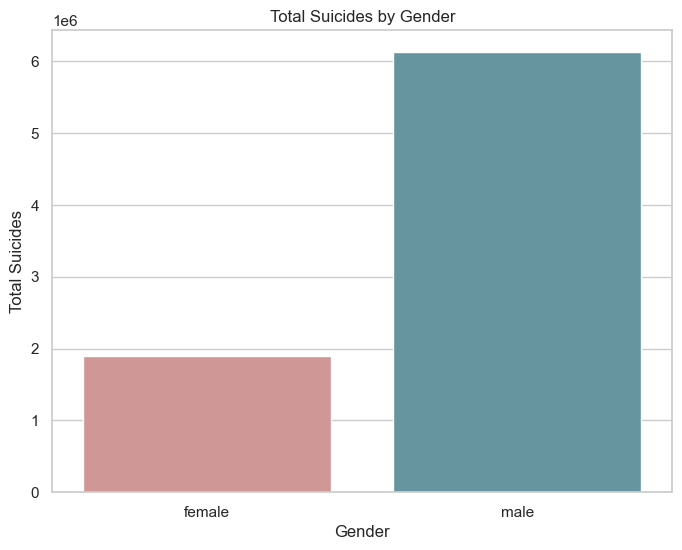

In [101]:
# Group data by gender and calculate the sum of suicides
gender_df = df.groupby("sex")["suicides_no"].sum().reset_index()

# Create the bar plot 
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_df, x="sex", y="suicides_no", palette={"male": "#5C9BAA", "female": "#D98E8E"})
plt.xlabel("Gender")
plt.ylabel("Total Suicides")
plt.title("Total Suicides by Gender")
plt.xticks(rotation=0)
plt.show()

- The data suggests that **males** might be more vulnerable to suicide compared to females, as the total number of suicides for males is substantially higher.

- The data highlights the need for continued efforts to **raise awareness about mental health issues and suicide prevention**, especially for males who may be less likely to seek help.

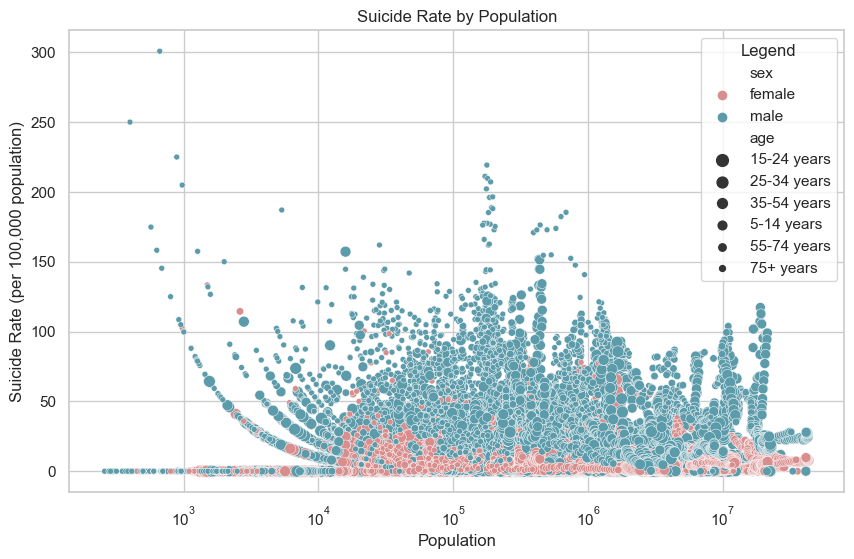

In [143]:
# Calculate suicide rate as suicides per 100,000 population
df["suicide_rate"] = (df["suicides_no"] / df["population"]) * 100000

# Create the scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="population", y="suicide_rate", hue="sex", size="age", palette={"male": "#5C9BAA", "female": "#D98E8E"})
plt.xlabel("Population")
plt.ylabel("Suicide Rate (per 100,000 population)")
plt.title("Suicide Rate by Population")
plt.xscale("log")  # Use log scale for x-axis (population)
# plt.yscale("log")  # Use log scale for y-axis (suicide rate)
plt.legend(title="Legend")
plt.show()

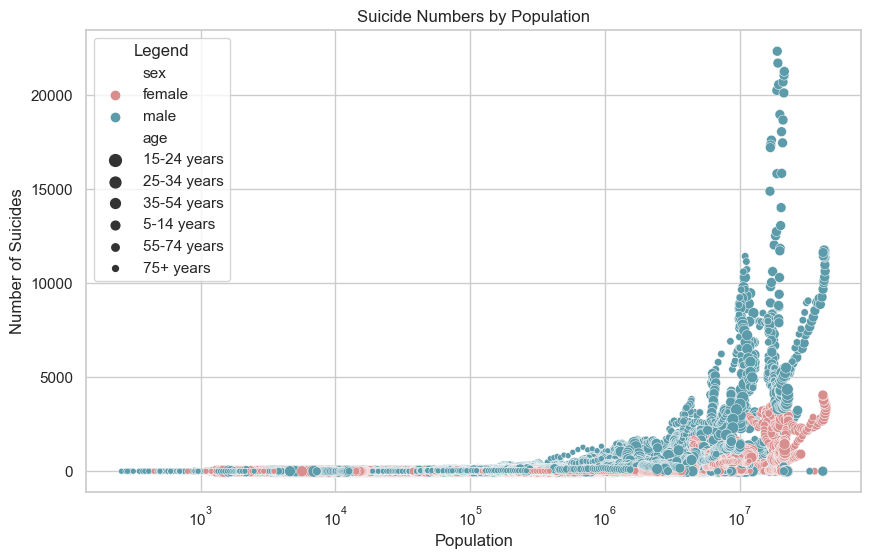

In [170]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="population", y="suicides_no", hue="sex", size="age",
                palette={"male": "#5C9BAA", "female": "#D98E8E"})
plt.xlabel("Population")
plt.ylabel("Number of Suicides")
plt.title("Suicide Numbers by Population")
plt.xscale("log")  # Use log scale for x-axis (population)
# plt.yscale("log")  # Use log scale for y-axis (suicide numbers)
plt.legend(title="Legend")
plt.show()

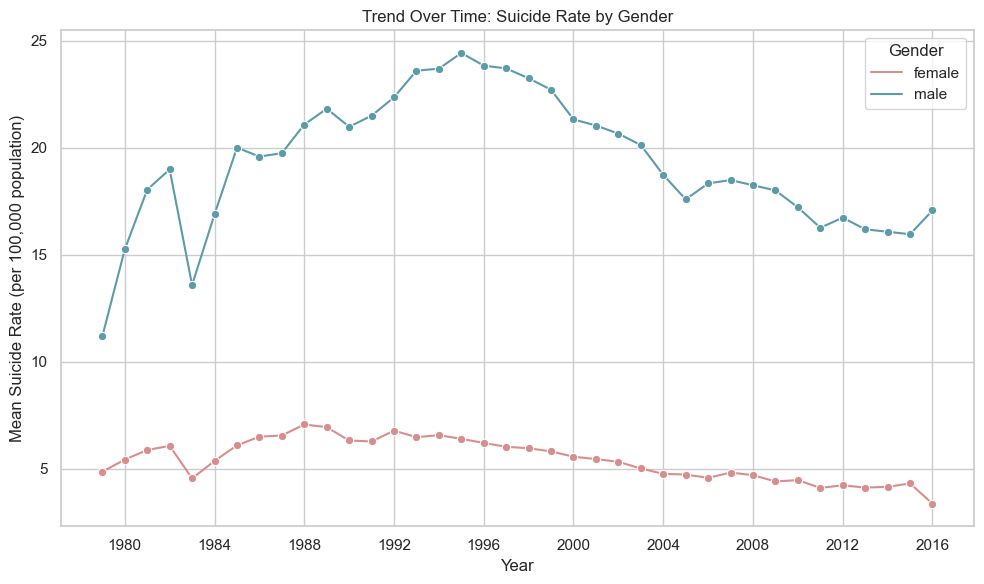

In [151]:
# Group data by year and gender, and calculate mean suicide rate
gender_year_stats = df.groupby(["year", "sex"])["suicide_rate"].mean().reset_index()

# Create the trend over time visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_year_stats, x="year", y="suicide_rate", hue="sex", marker="o",
             palette={"male": "#5C9BAA", "female": "#D98E8E"})
plt.xlabel("Year")
plt.ylabel("Mean Suicide Rate (per 100,000 population)")
plt.title("Trend Over Time: Suicide Rate by Gender")
plt.legend(title="Gender")
plt.grid(True)
plt.tight_layout()
plt.show()

It's evident that the **male** suicide rate is approximately **three or four times higher** than the female suicide rate across the given years.

In [160]:
# Group data by age group, gender, and calculate mean suicide rate
age_gender_stats = df.groupby(["age", "sex"])["suicide_rate"].mean().reset_index()
age_gender_stats.sort_values("suicide_rate", ascending=False)

,age,sex,suicide_rate
11,75+ years,male,36.853127
9,55-74 years,male,24.343484
5,35-54 years,male,23.147235
3,25-34 years,male,18.928233
1,15-24 years,male,12.464345
10,75+ years,female,10.233358
8,55-74 years,female,7.287930
4,35-54 years,female,5.863561
2,25-34 years,female,4.482761
0,15-24 years,female,4.113613


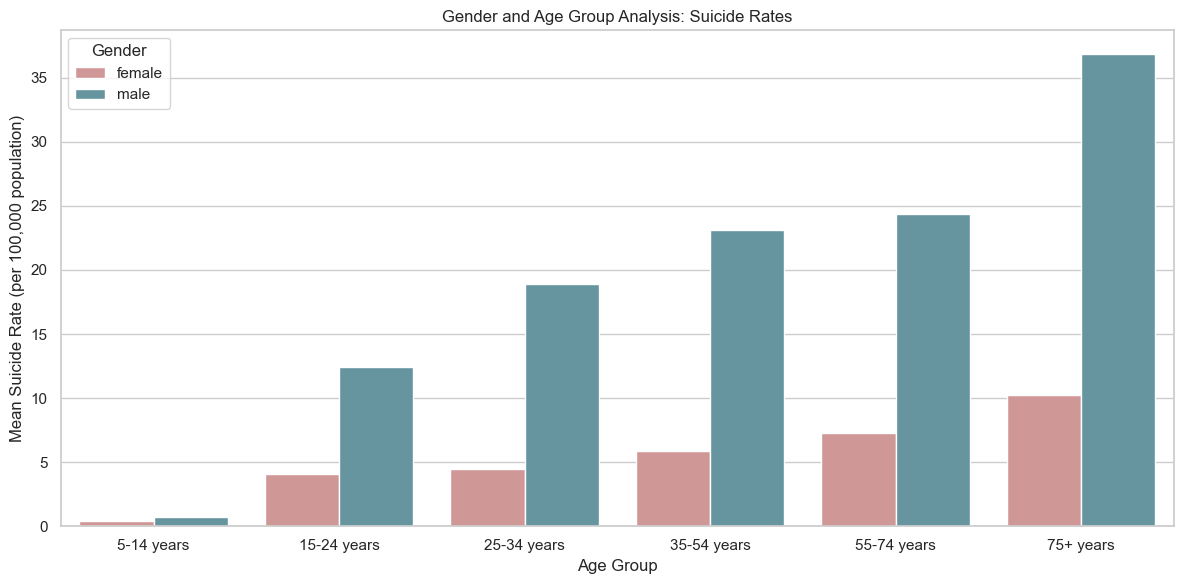

In [171]:
# Define the desired order based on age
age_order = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]

# Create the comparison plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=age_gender_stats, x="age", y="suicide_rate", hue="sex", 
            palette={"male": "#5C9BAA", "female": "#D98E8E"}, order=age_order)
plt.xlabel("Age Group")
plt.ylabel("Mean Suicide Rate (per 100,000 population)")
plt.title("Gender and Age Group Analysis: Suicide Rates")
plt.legend(title="Gender")
plt.xticks()
plt.tight_layout()
plt.show()

- The highest suicide rate is observed among males in the age group of 75+ years, with a rate of 36.85 per 100,000 population.
- The second highest suicide rate among males is in the age group of 55-74 years, at 24.34.
- Among females, the highest suicide rate is seen in the age group of 75+ years, though it's notably lower at 10.23 compared to the male counterpart.
- The age group of 5-14 years has the lowest suicide rates for both males (0.75) and females (0.43).
- Generally, **suicide rates tend to increase with age**, especially among males.

#### Task 3: Conclusion
**Recommendations:**

1. **Targeted Interventions for Vulnerable Groups:** Develop and implement focused suicide prevention strategies tailored to high-risk demographic groups. Special attention should be given to older males and young individuals.

2. **Elderly Mental Health Support:** Establish accessible mental health services and support systems for elderly individuals, especially males, to address the elevated suicide rates in this age group.

3. **Youth Awareness and Education:** Launch comprehensive mental health awareness and education campaigns targeting schools and universities to raise awareness about mental health issues among the younger population.

4. **Collaborative Efforts:** Collaborate with mental health organizations, healthcare professionals, educators, and policymakers to collectively address the complex factors contributing to suicide rates.